DAAA/FT/2A/01 2214296 Ng Wee Herng AIML CA2 <br>
Part B: Unsupervised Learning

## Background Information

You are running a shopping mall, and you have some data about your customers like
Age, Gender, Income and Spending.

### What is customer segmentation?
- Customer segmentation is the grouping of customers with shared characteristics
- Businesses can easily personalize marketing and sales efforts to the needs of specific groups with customer segmentation

### Types of customers in retail

#### 1. Loyal Customers
- Regular customers that frequent the mall, loyal

#### 2. Discount Customers
- Frequent shoppers
- Drivers of inventory turnover and can be key to cash flow strategy

#### 3. Impulse Customers
- Buy when inspiration strikes, make a buying decision in an instant
- Don't need much convincing to purchase

#### 4. Needs-Based Customers
- Specific purchase in mind, needs prompt, knowledgable help
- Can become loyal customers once they know their needs are met

#### 5. Wandering Customers
- Come in the store seeking an experience, opposed to a specific product or purpose

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.graph_objects as go
from scipy.cluster.hierarchy import dendrogram
from scipy.stats import pearsonr

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings

## Exploratory Data Analysis

In [2]:
data = pd.read_csv('./Customer_Dataset.csv')
data

CustomerID  Gender  Age  Income (k$)  How Much They Spend
0             1    Male   19           15                   39
1             2    Male   21           15                   81
2             3  Female   20           16                    6
3             4  Female   23           16                   77
4             5  Female   31           17                   40
..          ...     ...  ...          ...                  ...
195         196  Female   35          120                   79
196         197  Female   45          126                   28
197         198    Male   32          126                   74
198         199    Male   32          137                   18
199         200    Male   30          137                   83

[200 rows x 5 columns]

The dataset is collected from the shopping mall I am running (in this background context)

It contains 200 entries with 5 features

**CustomerID**: Unique identifier for a customer ranging from 0 to 199<br>
**Gender**: Customer's Gender (male, female)<br>
**Income(k$)**: Customer's income in thousands<br>
**Age**: Customer's age<br>
**How Much They Spend**: Spending score assigned to a customer


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CustomerID           200 non-null    int64 
 1   Gender               200 non-null    object
 2   Age                  200 non-null    int64 
 3   Income (k$)          200 non-null    int64 
 4   How Much They Spend  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
sns.set_style('darkgrid')
sns.set_palette('muted')

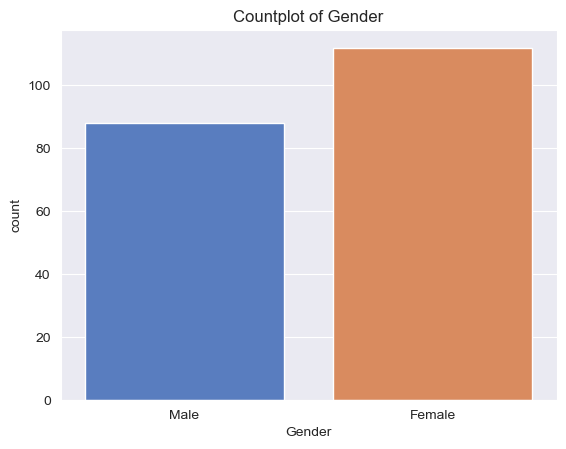

In [5]:
sns.countplot(x='Gender', data=data)
plt.title('Countplot of Gender')
plt.show()

We can see that there are more female than male customers at this shopping mall

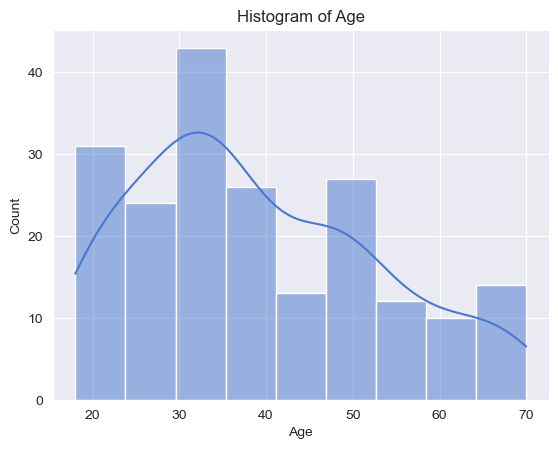

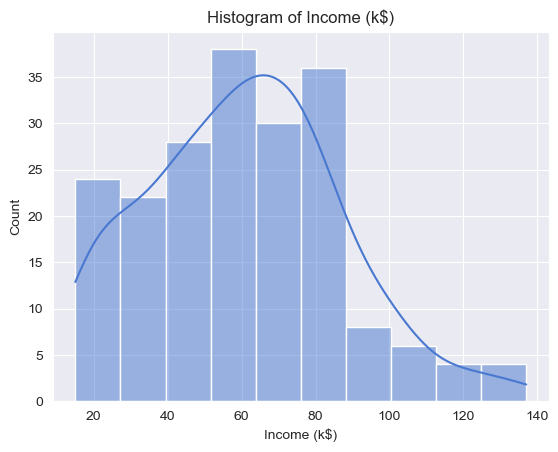

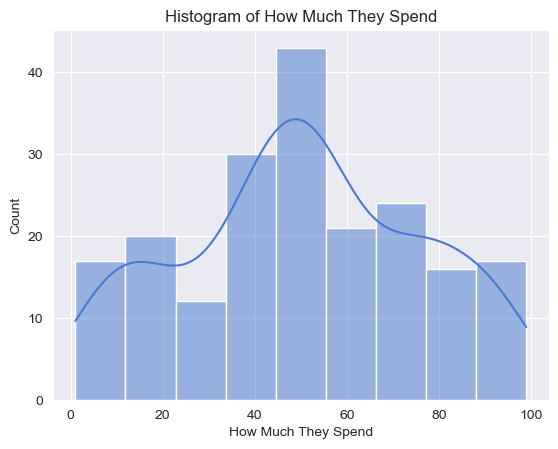

In [6]:
vars=['Age', 'Income (k$)', 'How Much They Spend']

for var in vars:
    sns.histplot(x=var, data=data, kde=True)
    plt.title(f'Histogram of {var}')
    plt.show()

From the histograms, we can see that Age and Income are slightly skewed to the left while Spending Score looks to have normal distribution

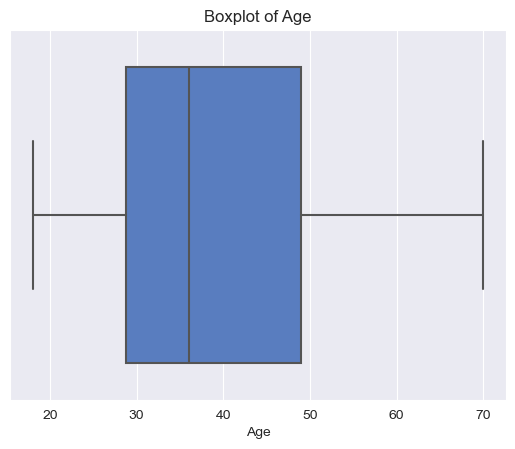

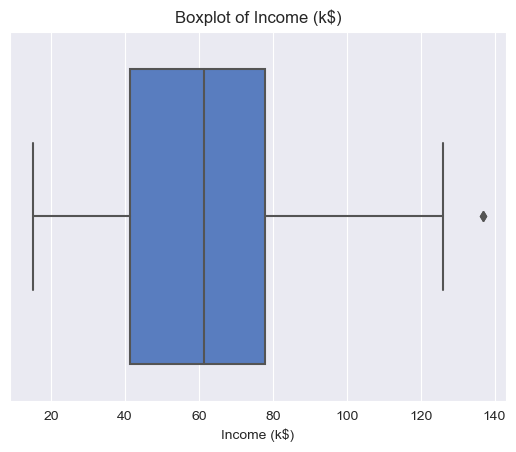

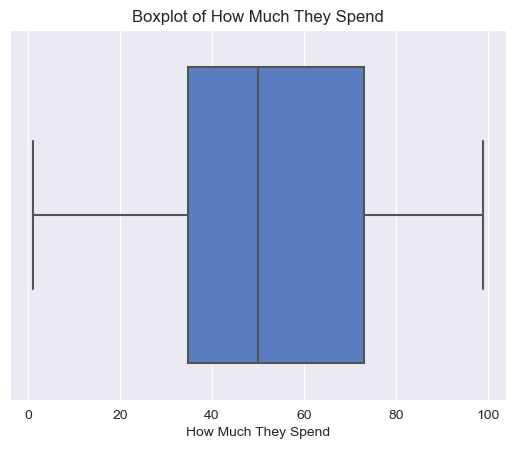

In [7]:
vars=['Age', 'Income (k$)', 'How Much They Spend']

for var in vars:
    sns.boxplot(x=var, data=data)
    plt.title(f'Boxplot of {var}')
    plt.show()

From the boxplots, we can see that:
- The age of customers range from teenagers (18) to elderly (70), with the median age being around 36-37 years old
- The income of customers range from 18k all the way to 140k, with the median income being around 62k
- The median spending score is around 50

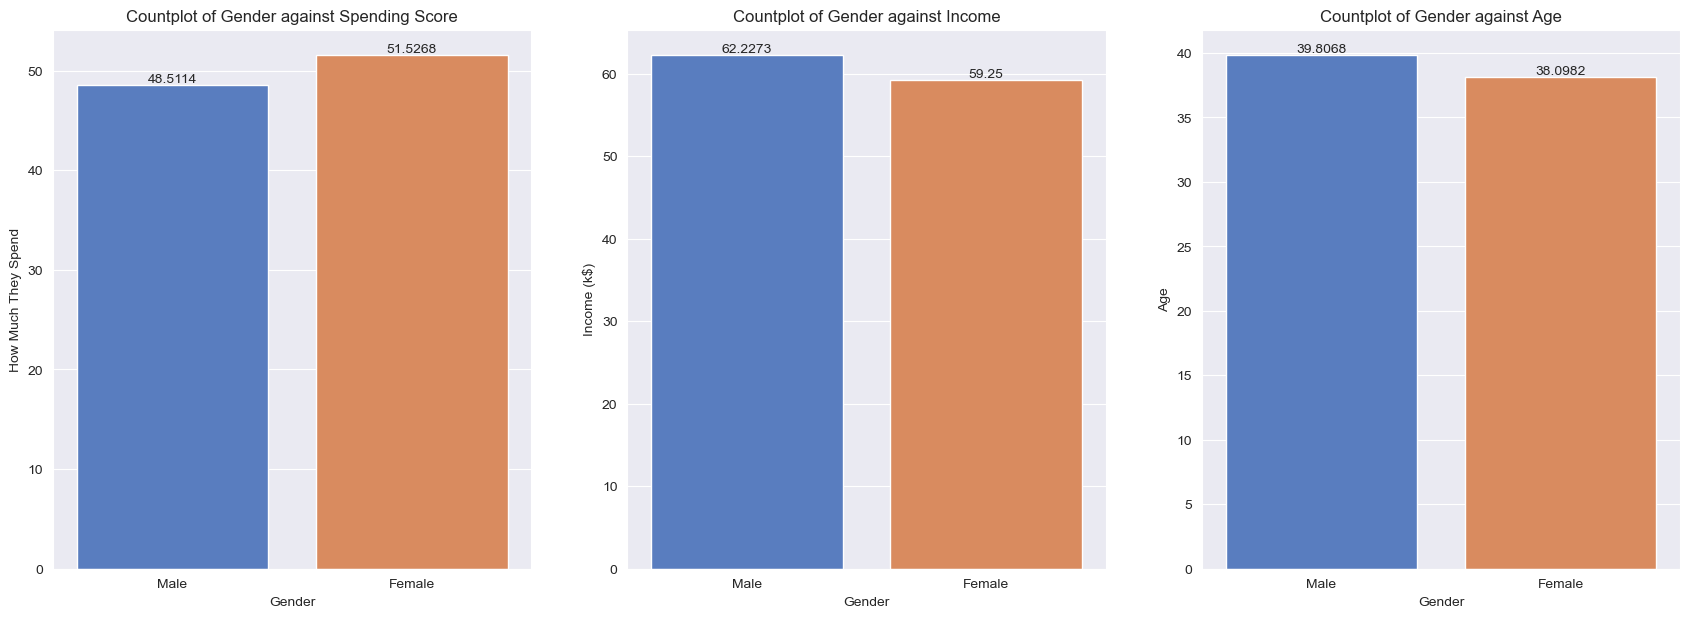

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))

sns.barplot(x='Gender', y='How Much They Spend', data=data, ci=None, ax=ax1)
ax1.set_title('Countplot of Gender against Spending Score')
for i in ax1.containers:
    ax1.bar_label(i,) # round it
    
sns.barplot(x='Gender', y='Income (k$)', data=data, ci=None, ax=ax2)
ax2.set_title('Countplot of Gender against Income')
for i in ax2.containers:
    ax2.bar_label(i,) # round it

sns.barplot(x='Gender', y='Age', data=data, ci=None, ax=ax3)
ax3.set_title('Countplot of Gender against Age')
for i in ax3.containers:
    ax3.bar_label(i,)
    
plt.show()

From these countplots, we can see that:
- Females on average have a higher spending score compared to males
- Males on average have a higher income compared to females
- Males on average are older than females

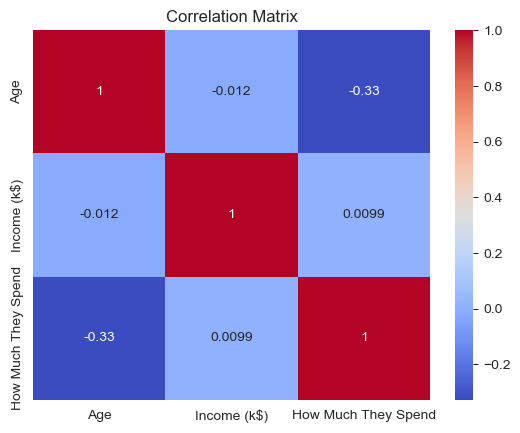

In [9]:
correlation_matrix = data[['Age', 'Income (k$)', 'How Much They Spend']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

From this heatmap, we can see that there is a correlation between the features but it is quite weak

C:\Users\ngwee\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ngwee\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ngwee\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


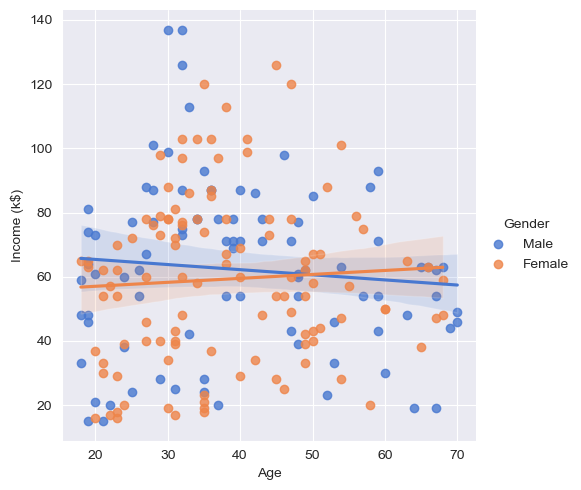

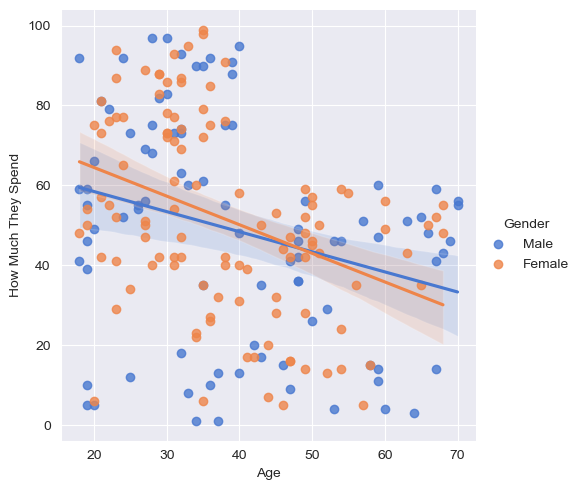

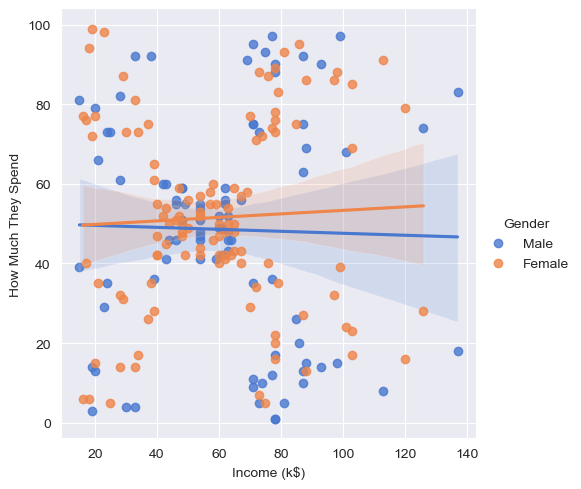

In [10]:
sns.lmplot('Age', 'Income (k$)', data=data, hue='Gender')
sns.lmplot('Age', 'How Much They Spend', data=data, hue='Gender')
sns.lmplot('Income (k$)', 'How Much They Spend', data=data, hue='Gender')

plt.show()

From these seaborn lmplots, we can see that gender does not really play a role as the correlations are very similar for males and females. 

We will not be using gender for our models

### Feature Engineering
#### Looking at our features

Customer ID is just an incremental number to identify each customer, and is not a feature that will be helpful in determining the clusters.

In [11]:
data = data.drop(['CustomerID'], axis=1)
data

Gender  Age  Income (k$)  How Much They Spend
0      Male   19           15                   39
1      Male   21           15                   81
2    Female   20           16                    6
3    Female   23           16                   77
4    Female   31           17                   40
..      ...  ...          ...                  ...
195  Female   35          120                   79
196  Female   45          126                   28
197    Male   32          126                   74
198    Male   32          137                   18
199    Male   30          137                   83

[200 rows x 4 columns]

As the model does not understand categorical values, we will have to change the format of our features to numerical form. There are a few ways to do this.

#### Ordinal Encoding 
- Used for ordinal data (qualitative data that groups variables into ordered categories)

#### One Hot Encoding
- Used for nominal data (data that can be labelled into mutually exclusive categories within a variable)

As Gender is nominal, we will be using OneHotEncoder() from sklearn

In [12]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

Here, we use the OneHotEncoder() from sklearn, dropping the first column with the drop='if_binary' as there are only two categories for both of the features.

In [13]:
enc = OneHotEncoder(drop = 'if_binary')
data[['Gender']] = enc.fit_transform(data[["Gender"]]).toarray()
data

Gender  Age  Income (k$)  How Much They Spend
0       1.0   19           15                   39
1       1.0   21           15                   81
2       0.0   20           16                    6
3       0.0   23           16                   77
4       0.0   31           17                   40
..      ...  ...          ...                  ...
195     0.0   35          120                   79
196     0.0   45          126                   28
197     1.0   32          126                   74
198     1.0   32          137                   18
199     1.0   30          137                   83

[200 rows x 4 columns]

Now we can see that Gender is in numerical format, where: <br>
Male → 1, Female → 0

#### Feature Scaling


There are two types of feature scaling techniques<br>

1. Standardization (Z-score normalization)
- Using StandardScaler() from sklearn
- It standardizes features by removing the mean and scaling to unit variance
- The standard score of a sample $x$ is calculated as:
<p style="text-align: center;">$z=\dfrac{(x-u)}{s}$,</p>
<p style="text-align: center;">where $u$ is the mean and $s$ is the standard deviation of the training samples</p>

2. Min-Max Scaling
- Using MinMaxScaler() from sklearn
- Transform features by scaling each feature to a given range
- A Min-Max scaling is typically done by:
<p style="text-align: center;">$X_{norm}=\dfrac{X-X_{min}}{X_{max}-X_{min}}$</p>

We will be using Standardization with the help of StandardScaler() from sklearn

#### Why?
In clustering analyses, standardization may be especially crucial in order to compare similarities between features based on certain distance measures<br>(taken from slides in Brightspace)

In [14]:
num_col = ['Age', 'Income (k$)', 'How Much They Spend']

scale = StandardScaler()
data[num_col] = scale.fit_transform(data[num_col])
data

Gender       Age  Income (k$)  How Much They Spend
0       1.0 -1.424569    -1.738999            -0.434801
1       1.0 -1.281035    -1.738999             1.195704
2       0.0 -1.352802    -1.700830            -1.715913
3       0.0 -1.137502    -1.700830             1.040418
4       0.0 -0.563369    -1.662660            -0.395980
..      ...       ...          ...                  ...
195     0.0 -0.276302     2.268791             1.118061
196     0.0  0.441365     2.497807            -0.861839
197     1.0 -0.491602     2.497807             0.923953
198     1.0 -0.491602     2.917671            -1.250054
199     1.0 -0.635135     2.917671             1.273347

[200 rows x 4 columns]

As we can see, the numerical columns have been standardized 

### Dimension Reduction

- Dimension Reduction may be used when a dataset has a lot of features
- Some methods of dimension reduction are: 
    1. Principal Component Analysis (PCA)
    2. Singular Value Decomposition (SVD)
    3. Linear Discriminant Analysis (LDA)
    
However, our dataset has only 4 features, which means that we will not be performing dimension reduction as the number of features are already quite small

## Clustering

### K-Means

K-means is a simple algorithm for clustering data, assigning each data point to one of the clusters by minimizing the WCSS (within cluster sum of squares)

#### Determining the number of k

#### 1. Elbow Method (Inertia)

Inertia is the sum of squared distance of samples to their closest cluster center. 

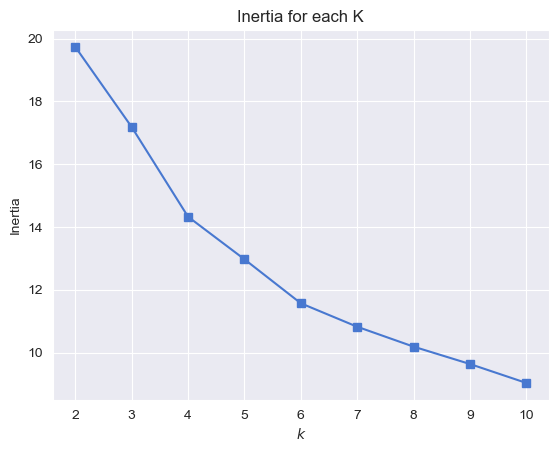

In [15]:
warnings.filterwarnings("ignore")

inertia = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=1)
    kmeans.fit(data[['Age', 'Income (k$)', 'How Much They Spend']]) 
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(2, 11), inertia, marker="s")
plt.title("Inertia for each K")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.show()

To find the number of k, we look for the point where the curve flattens.<br>
However, it is not very clear, so we will move on to another method for determining k, by comparing silhouette score

#### 2. Silhouette Score
- A higher silhouette coefficient score relates to a model with better defined clusters
- It is composed of two scores:
    - a: The mean distance between a sample and all other points in the same class
    - b: The mean distance between a sample and all other points in the next nearest cluster
    
The silhouette coefficient for a given sample is given as:<br>
$s = \frac{b - a}{\max(a, b)}$

For n_clusters=2, The Silhouette Coefficient is 0.335
For n_clusters=3, The Silhouette Coefficient is 0.358
For n_clusters=4, The Silhouette Coefficient is 0.404
For n_clusters=5, The Silhouette Coefficient is 0.417
For n_clusters=6, The Silhouette Coefficient is 0.427
For n_clusters=7, The Silhouette Coefficient is 0.418
For n_clusters=8, The Silhouette Coefficient is 0.408
For n_clusters=9, The Silhouette Coefficient is 0.419
For n_clusters=10, The Silhouette Coefficient is 0.4


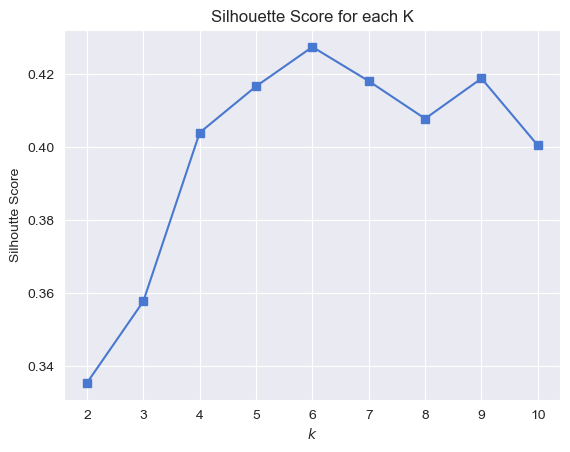

In [16]:
silhouette = []

for k in range(2, 11):
    model = KMeans(n_clusters=k, init='k-means++', random_state=1).fit(data[['Age', 'Income (k$)', 'How Much They Spend']])
    label = model.labels_
    sil_coeff = silhouette_score(data[['Age', 'Income (k$)', 'How Much They Spend']], label, metric='euclidean')
    silhouette.append(sil_coeff)
    print(f"For n_clusters={k}, The Silhouette Coefficient is {round(sil_coeff, 3)}")
    
plt.plot(range(2, 11), silhouette, marker="s")
plt.title("Silhouette Score for each K")
plt.xlabel("$k$")
plt.ylabel("Silhoutte Score")
plt.show()

From the silhouette plot, we can see that k=6 gives the highest silhouette score, and we will be using that for our clustering model

In [17]:
kmeans = KMeans(n_clusters=6, init='k-means++').fit(data[['Age', 'Income (k$)', 'How Much They Spend']])

kmeans_clustered = data[['Age', 'Income (k$)', 'How Much They Spend']].copy()
kmeans_clustered.loc[:,'Cluster'] = kmeans.labels_ 

Here we fit the kmeans model with the k-means++ initialization. This algorithm guarantees a more intelligent introduction of the centroids and improves the nature of the clustering.

In [18]:
km_sizes = kmeans_clustered.groupby('Cluster').size().to_frame()
km_sizes.columns = ["KM_size"]
km_sizes

KM_size
Cluster         
0             39
1             39
2             45
3             33
4             21
5             23

In [19]:
kmeans_clustered

Age  Income (k$)  How Much They Spend  Cluster
0   -1.424569    -1.738999            -0.434801        5
1   -1.281035    -1.738999             1.195704        5
2   -1.352802    -1.700830            -1.715913        4
3   -1.137502    -1.700830             1.040418        5
4   -0.563369    -1.662660            -0.395980        4
..        ...          ...                  ...      ...
195 -0.276302     2.268791             1.118061        0
196  0.441365     2.497807            -0.861839        3
197 -0.491602     2.497807             0.923953        0
198 -0.491602     2.917671            -1.250054        3
199 -0.635135     2.917671             1.273347        0

[200 rows x 4 columns]

As there are more than 2 features, we will plot 2 scatter plots, and then a 3d plot with the help of plotly for visualization

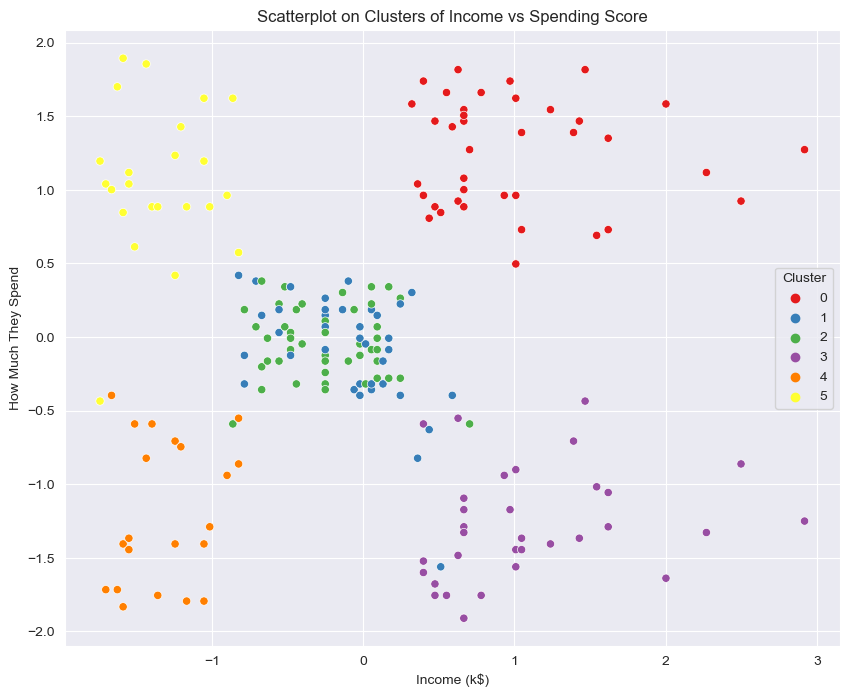

In [20]:
fig=plt.subplots(figsize=(10,8))
sns.scatterplot(x='Income (k$)', y='How Much They Spend', data=kmeans_clustered, hue='Cluster', palette='Set1', legend='full')
plt.title('Scatterplot on Clusters of Income vs Spending Score')
plt.show()

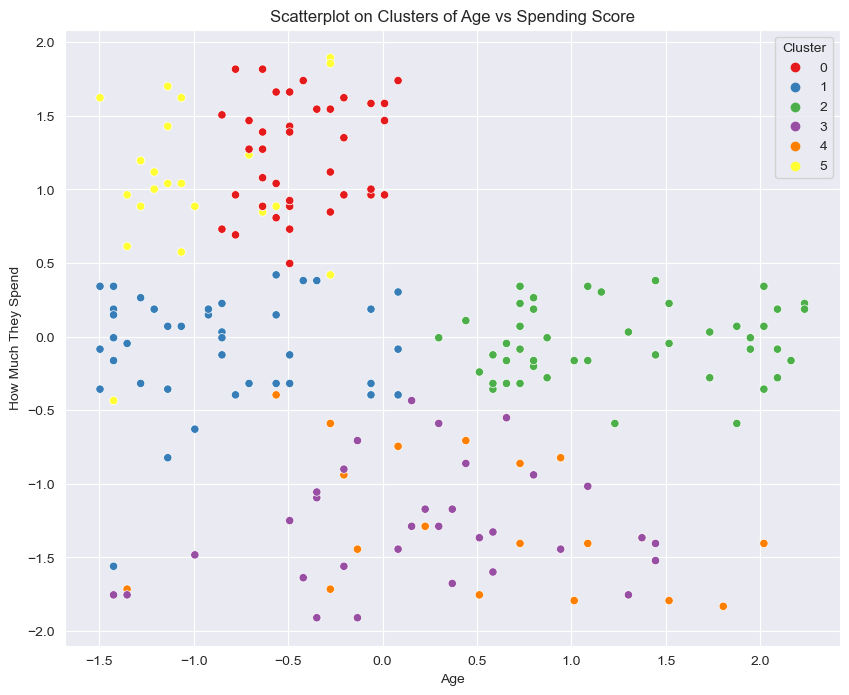

In [21]:
fig=plt.subplots(figsize=(10,8))
sns.scatterplot(x='Age', y='How Much They Spend', data=kmeans_clustered, hue='Cluster', palette='Set1', legend='full')
plt.title('Scatterplot on Clusters of Age vs Spending Score')
plt.show()

In [22]:
x = data[['Age','Income (k$)','How Much They Spend']].values

In [23]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Age'),yaxis = dict(title  = 'Income (k$)'),zaxis = dict(title  = 'How Much They Spend'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = kmeans.labels_
trace = go.Scatter3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data1 = [trace]
fig = go.Figure(data = data1, layout = layout)
fig.show()

In [24]:
sil_km = silhouette_score(data[['Age', 'Income (k$)', 'How Much They Spend']], kmeans.labels_)
print(sil_km)

0.4284167762892593


### Agglomerative Clustering (Hierarchical)

Agglomerative Clustering is a type of hierarchical clustering that divides the population into clusters.

To choose the number of k in this case, we will be plotting a dendrogram

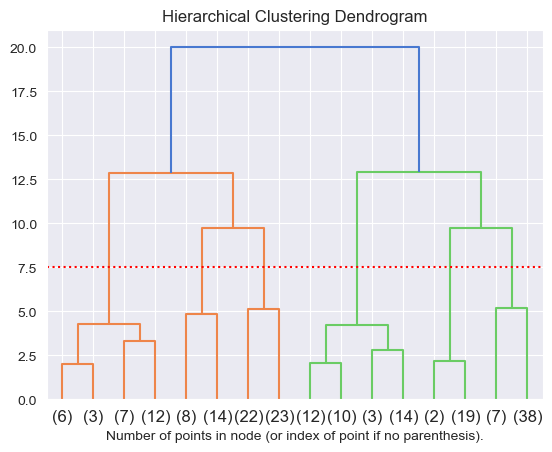

In [25]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

X = data[['Age', 'Income (k$)', 'How Much They Spend']]
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.hlines(7.5, 0, 300, colors="r", linestyle=":")
plt.show()

From this dendrogram, we cut the clusters at around the 7.5 mark, and counting the number of horizontal lines from that cut, there are 6 clusters.<br>

We will fit the model with 6 clusters

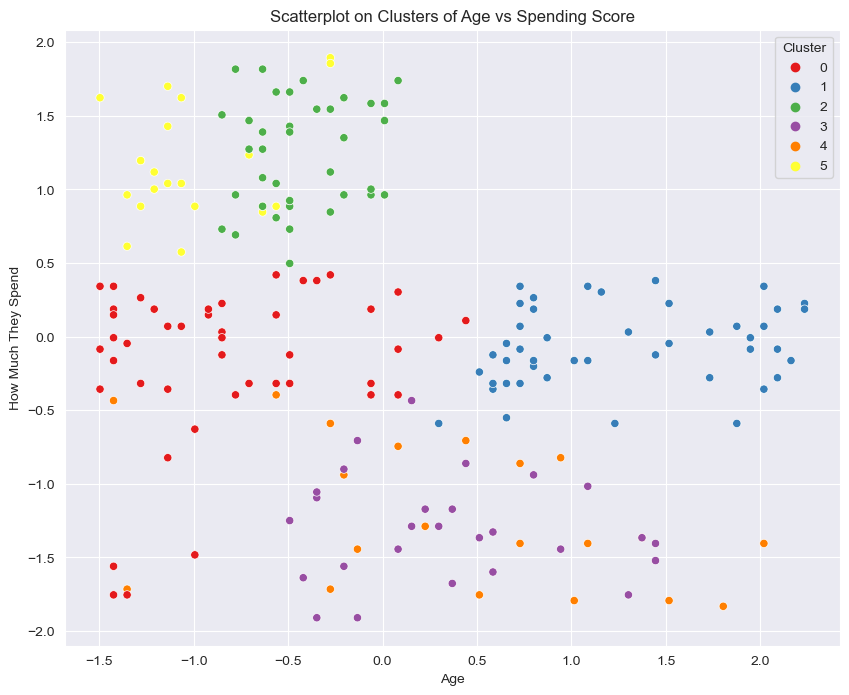

In [26]:
# Setting Number of Cluster to 6
agg_cluster_6 = AgglomerativeClustering(n_clusters=6).fit(X)

agg_clustered = data[['Age', 'Income (k$)', 'How Much They Spend']].copy()
agg_clustered.loc[:,'Cluster'] = agg_cluster_6.labels_

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='How Much They Spend', data=agg_clustered, hue='Cluster', palette='Set1', legend='full')
plt.title('Scatterplot on Clusters of Age vs Spending Score')
plt.show()

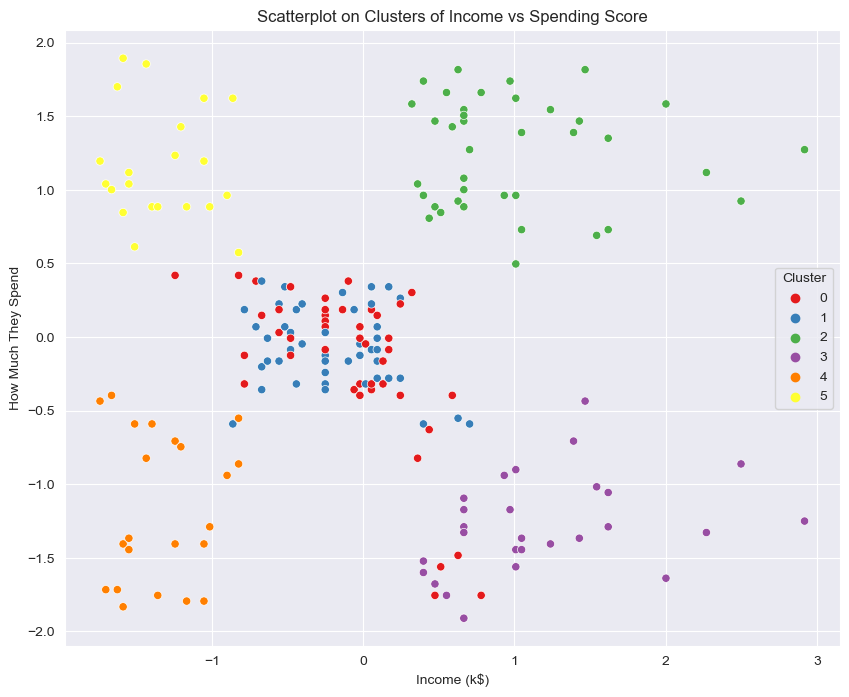

In [27]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Income (k$)', y='How Much They Spend', data=agg_clustered, hue='Cluster', palette='Set1', legend='full')
plt.title('Scatterplot on Clusters of Income vs Spending Score')
plt.show()

In [28]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Age'),yaxis = dict(title  = 'Income (k$)'),zaxis = dict(title  = 'How Much They Spend'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = agg_cluster_6.labels_
trace = go.Scatter3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data1 = [trace]
fig = go.Figure(data = data1, layout = layout)
fig.show()

In [29]:
sil_agg = silhouette_score(data[['Age', 'Income (k$)', 'How Much They Spend']], agg_cluster_6.labels_)
print(sil_agg)

0.4201169558789579


From the plots, we can see that K-means and Agglomerative Clustering are similar, with K-means having a bit higher of a silhouette score

#### Spectral Clustering

Spectral clustering is a technique with roots in graph theory, where the approach is used to identify communities of nodes in a graph based on the edges connecting them.

We will be using the silhouette plot again to find the optimal number of k

For n_clusters=2, The Silhouette Coefficient is 0.334
For n_clusters=3, The Silhouette Coefficient is 0.354
For n_clusters=4, The Silhouette Coefficient is 0.404
For n_clusters=5, The Silhouette Coefficient is 0.38
For n_clusters=6, The Silhouette Coefficient is 0.429
For n_clusters=7, The Silhouette Coefficient is 0.422
For n_clusters=8, The Silhouette Coefficient is 0.394
For n_clusters=9, The Silhouette Coefficient is 0.386
For n_clusters=10, The Silhouette Coefficient is 0.408


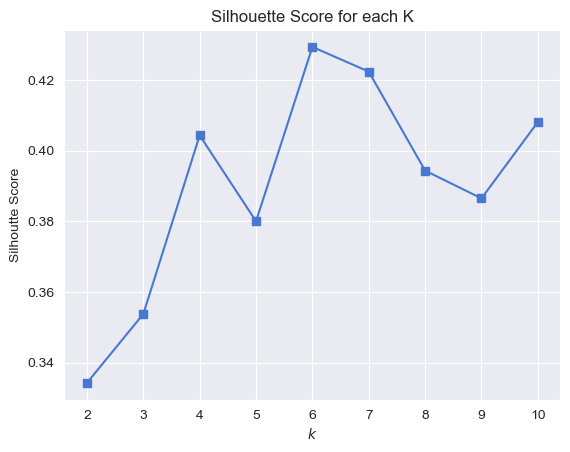

In [30]:
silhouette = []

for k in range(2, 11):
    model = SpectralClustering(n_clusters=k, assign_labels="discretize", random_state=1).fit(data[['Age', 'Income (k$)', 'How Much They Spend']])
    label = model.labels_
    sil_coeff = silhouette_score(data[['Age', 'Income (k$)', 'How Much They Spend']], label, metric='euclidean')
    silhouette.append(sil_coeff)
    print(f"For n_clusters={k}, The Silhouette Coefficient is {round(sil_coeff, 3)}")
    
plt.plot(range(2, 11), silhouette, marker="s")
plt.title("Silhouette Score for each K")
plt.xlabel("$k$")
plt.ylabel("Silhoutte Score")
plt.show()

From the silhouette plot, it seems that the optimal number of k is also 6, thus we will be implementing that into our model

In [31]:
spectral = SpectralClustering(n_clusters=6, assign_labels="discretize", random_state=1).fit(data[['Age', 'Income (k$)', 'How Much They Spend']])

spec_clustered = data[['Age', 'Income (k$)', 'How Much They Spend']].copy()
spec_clustered.loc[:,'Cluster'] = spectral.labels_ 
spec_clustered

Age  Income (k$)  How Much They Spend  Cluster
0   -1.424569    -1.738999            -0.434801        4
1   -1.281035    -1.738999             1.195704        4
2   -1.352802    -1.700830            -1.715913        0
3   -1.137502    -1.700830             1.040418        4
4   -0.563369    -1.662660            -0.395980        0
..        ...          ...                  ...      ...
195 -0.276302     2.268791             1.118061        1
196  0.441365     2.497807            -0.861839        3
197 -0.491602     2.497807             0.923953        1
198 -0.491602     2.917671            -1.250054        3
199 -0.635135     2.917671             1.273347        1

[200 rows x 4 columns]

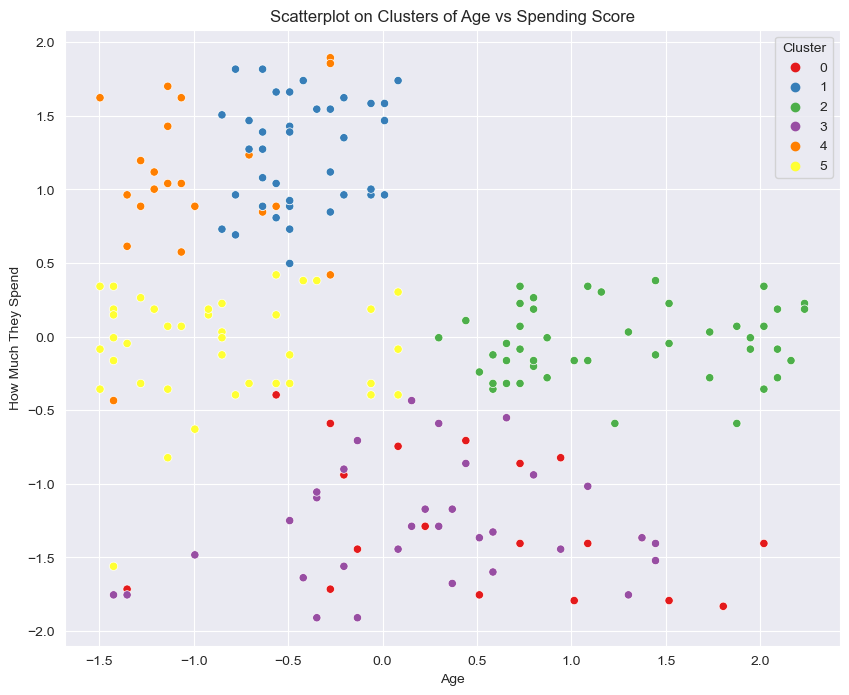

In [32]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='How Much They Spend', data=spec_clustered, hue='Cluster', palette='Set1', legend='full')
plt.title('Scatterplot on Clusters of Age vs Spending Score')
plt.show()

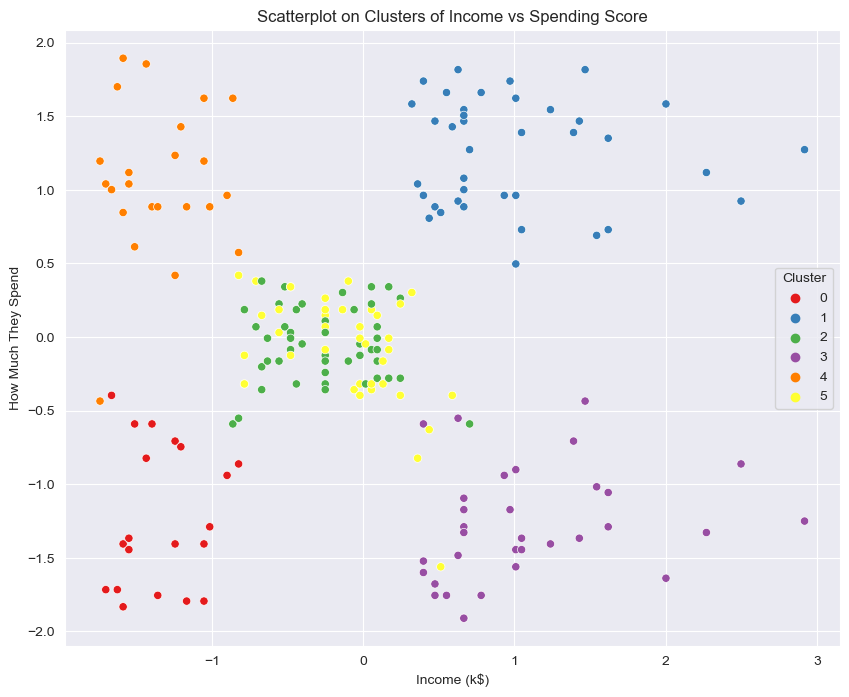

In [33]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Income (k$)', y='How Much They Spend', data=spec_clustered, hue='Cluster', palette='Set1', legend='full')
plt.title('Scatterplot on Clusters of Income vs Spending Score')
plt.show()

In [34]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Age'),yaxis = dict(title  = 'Income (k$)'),zaxis = dict(title  = 'How Much They Spend'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = spectral.labels_
trace = go.Scatter3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data1 = [trace]
fig = go.Figure(data = data1, layout = layout)
fig.show()

In [35]:
sil_spec = silhouette_score(data[['Age', 'Income (k$)', 'How Much They Spend']], spectral.labels_)
print(sil_spec)

0.4293614515358638


We can see that Spectral Clustering is again, very similar to K-Means and Agglomerative Clustering from both a visual standpoint and by the value of the silhouette score

#### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN groups 'densely grouped' data points into a single cluster. It can identify clusters in large spatial datasets by looking at the local density of the data points.

DBSCAN needs hyperparameter tuning with its 2 parameters, epsilon and min point.

We will be using DBSCAN's default parameters first before hyperparameter tuning.

In [36]:
db = DBSCAN(n_jobs=-1).fit(data[['Age', 'Income (k$)', 'How Much They Spend']])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(silhouette_score(data[['Age', 'Income (k$)', 'How Much They Spend']], labels))

0.18451372756506046


The silhouette score is quite low compared to the other models, which may mean that the model needs further tuning. Firstly, we will plot out the untuned DBSCAN to see how it performs

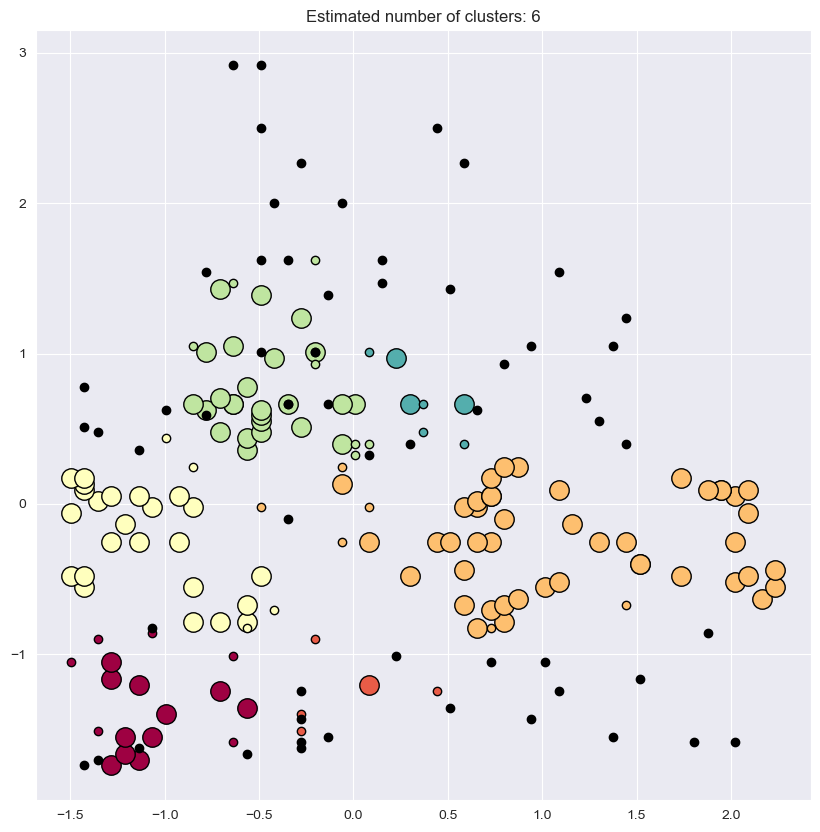

In [37]:
plt.figure(figsize=(10, 10))

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = data[['Age', 'Income (k$)', 'How Much They Spend']][class_member_mask & core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = data[['Age', 'Income (k$)', 'How Much They Spend']][class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

We see that actually DBSCAN did form 6 clusters, which does align with our models that we have implemented above. This could mean that the current epsilon value (default = 0.5) is optimal for this data.<br>

However, there are many dots that are black that are considered outliers, and so we need to tune the min point parameter (default = 5) to try to reduce the number of outliers to improve the clustering

#### Hyperparameter Tuning DBSCAN

For hyperparameter tuning, we will be looping through different values of epsilon and min points.<br>

Since we are satisfied with the epsilon value as it formed a reasonable number of clusters, we will tune the min_samples parameter

In [40]:
min_samples_grid = np.arange(3, 10)

scoreArr = []

for min_samples in min_samples_grid:
    db = DBSCAN(eps=0.5,min_samples=min_samples,n_jobs=-1).fit(data[['Age', 'Income (k$)', 'How Much They Spend']])
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    scoreArr.append([str([min_samples]),silhouette_score(data[['Age', 'Income (k$)', 'How Much They Spend']], labels)])

scoreArr = pd.DataFrame(scoreArr).rename({0:"Params",1:"Silhouette Score"},axis=1).sort_values(['Silhouette Score'],ascending=False)
scoreArr.head(10)

Params  Silhouette Score
4    [7]          0.223615
3    [6]          0.207328
2    [5]          0.184514
0    [3]          0.131576
5    [8]          0.120539
1    [4]          0.112211
6    [9]          0.109218

It seems that the optimal min_samples is 7, as the silhouette score increases until 7 and starts to decrease from then

0.2236154132178232


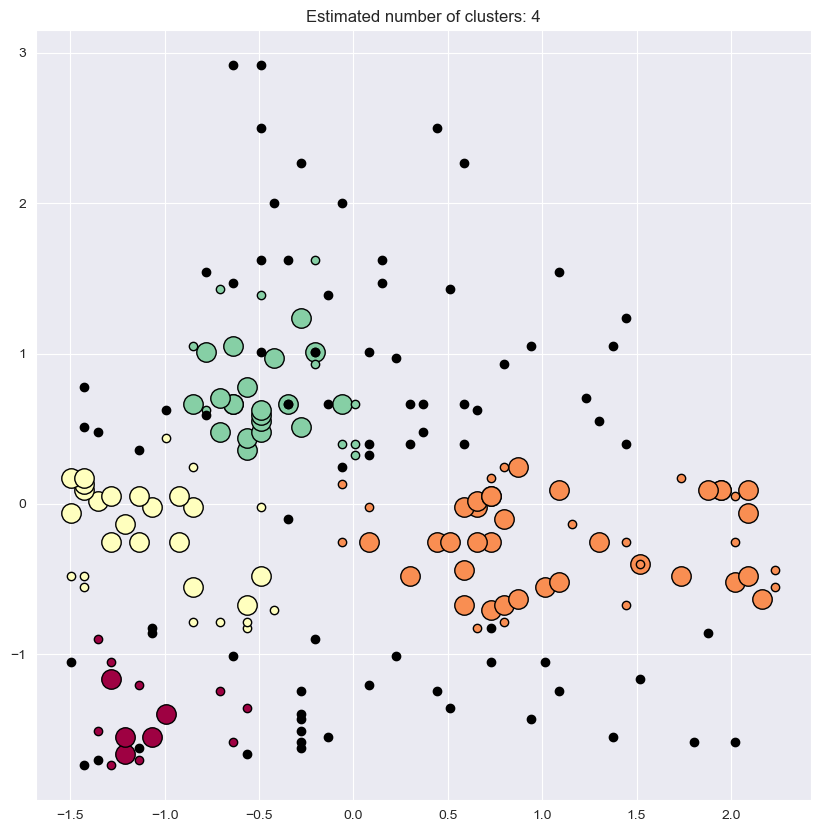

In [41]:
db = DBSCAN(eps=0.5, min_samples=7, n_jobs=-1).fit(data[['Age', 'Income (k$)', 'How Much They Spend']])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

sil_db = silhouette_score(data[['Age', 'Income (k$)', 'How Much They Spend']], labels)
print(sil_db)

plt.figure(figsize=(10, 10))

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = data[['Age', 'Income (k$)', 'How Much They Spend']][class_member_mask & core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = data[['Age', 'Income (k$)', 'How Much They Spend']][class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

After tuning, we see that DBSCAN has formed 4 clusters, and the silhouette score has improved from the untuned DBSCAN model

#### Gaussian Mixture Model (GMM)

- GMM clustering aims to partition n observations into k clusters.
- It defines a soft assignment for each sample
- Each sample has a probability to be associated with each cluster

Similar to DBSCAN, we are looping through possible values for each parameter in GMM, like a GridSearch, and instead of silhouette score, we are using Bayesian Information Criterion (BIC) as an evaluation metric.

BIC gives us an estimation on how good the GMM is in terms of predicting the data we actually have. The lower is the BIC, the better the model

In [42]:
n_components = range(1, 21)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=pd.DataFrame(columns=['cov', 'n_comp', 'bic'])
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state=3)
        gmm.fit(data[['Age', 'Income (k$)', 'How Much They Spend']])
        bic_score = gmm.bic(data[['Age', 'Income (k$)', 'How Much They Spend']])
        score = score.append({'cov': cov, 'n_comp': n_comp, 'bic': bic_score}, ignore_index=True)
        
score = score.sort_values(by="bic", ascending=True)
score.head(5)

cov n_comp          bic
45       diag      6  1535.368372
46       diag      7  1557.160249
7   spherical      8  1559.424944
6   spherical      7  1562.172506
9   spherical     10  1565.633567

Here we see that the parameters that give us the lowest BIC is a covariance type of diagonal and 6 components

In [43]:
gmm = GaussianMixture(n_components=6, covariance_type='diag', random_state=1).fit(data[['Age', 'Income (k$)', 'How Much They Spend']])

gmm_clustered = data[['Age', 'Income (k$)', 'How Much They Spend']].copy()
gmm_clustered.loc[:,'Cluster'] = gmm.predict(data[['Age', 'Income (k$)', 'How Much They Spend']])
gmm_clustered

Age  Income (k$)  How Much They Spend  Cluster
0   -1.424569    -1.738999            -0.434801        1
1   -1.281035    -1.738999             1.195704        0
2   -1.352802    -1.700830            -1.715913        1
3   -1.137502    -1.700830             1.040418        0
4   -0.563369    -1.662660            -0.395980        1
..        ...          ...                  ...      ...
195 -0.276302     2.268791             1.118061        4
196  0.441365     2.497807            -0.861839        2
197 -0.491602     2.497807             0.923953        4
198 -0.491602     2.917671            -1.250054        2
199 -0.635135     2.917671             1.273347        4

[200 rows x 4 columns]

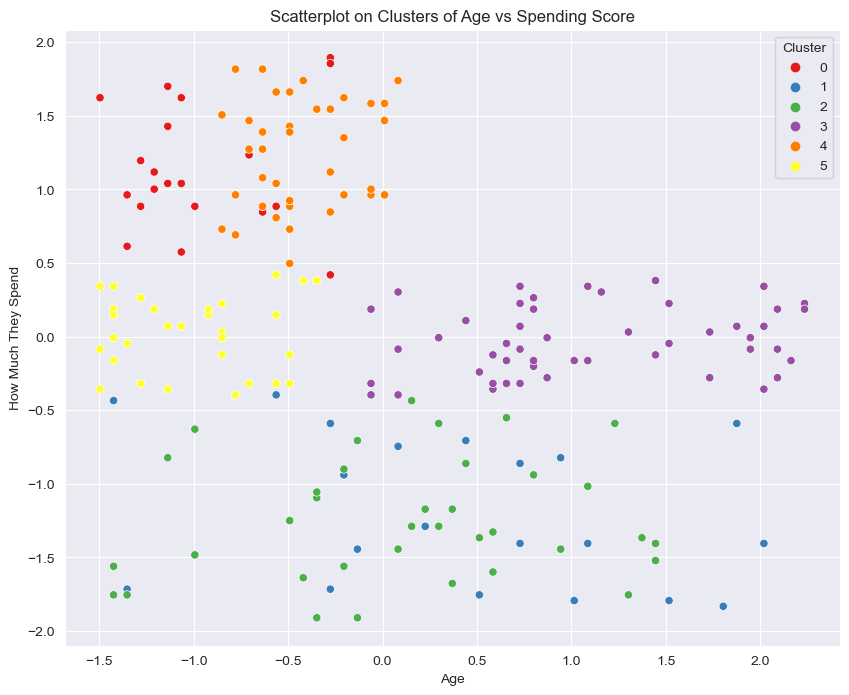

In [44]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='How Much They Spend', data=gmm_clustered, hue='Cluster', palette='Set1', legend='full')
plt.title('Scatterplot on Clusters of Age vs Spending Score')
plt.show()

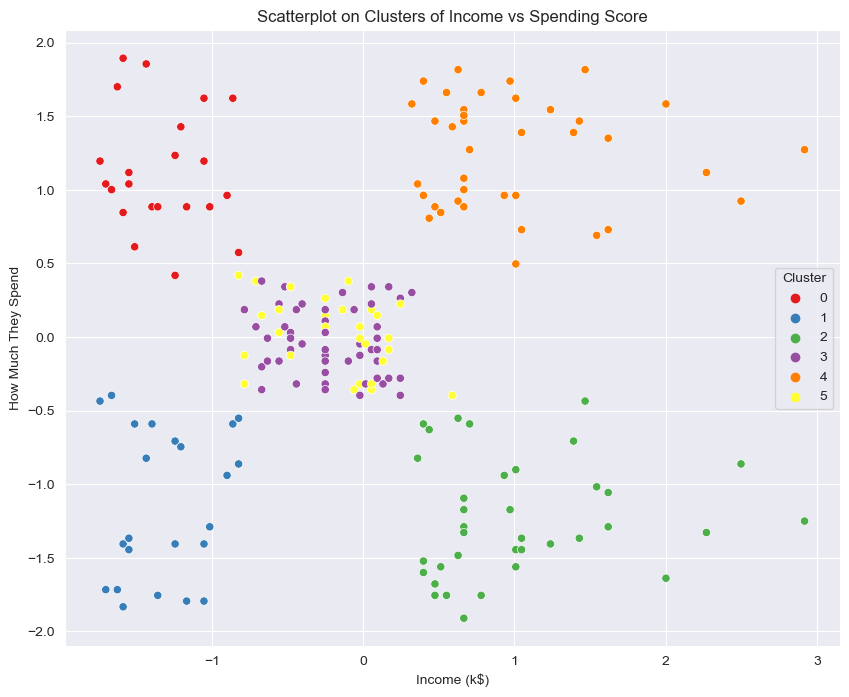

In [45]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Income (k$)', y='How Much They Spend', data=gmm_clustered, hue='Cluster', palette='Set1', legend='full')
plt.title('Scatterplot on Clusters of Income vs Spending Score')
plt.show()

In [46]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Age'),yaxis = dict(title  = 'Income (k$)'),zaxis = dict(title  = 'How Much They Spend'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = gmm.predict(data[['Age', 'Income (k$)', 'How Much They Spend']])
trace = go.Scatter3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data1 = [trace]
fig = go.Figure(data = data1, layout = layout)
fig.show()

In [47]:
sil_gmm = silhouette_score(data[['Age', 'Income (k$)', 'How Much They Spend']], gmm.predict(data[['Age', 'Income (k$)', 'How Much They Spend']]))
print(sil_gmm)

0.4088587422417899


### Model Evaluation

After fitting all our models to the data, we will choose one model to interpret its clusters and find out characteristics about each cluster

In [48]:
print(f'K-Means: {sil_km}')
print(f'Agglomerative: {sil_agg}')
print(f'Spectral: {sil_spec}')
print(f'DBSCAN: {sil_db}')
print(f'Gaussian Mixture Model: {sil_gmm}')

K-Means: 0.4284167762892593
Agglomerative: 0.4201169558789579
Spectral: 0.4293614515358638
DBSCAN: 0.2236154132178232
Gaussian Mixture Model: 0.4088587422417899


Using silhouette score as an evaluation metric across all models, we can see that:
- DBSCAN is the worst performing model
- The other model all have similar scores, with Spectral Clustering having the highest silhouette score

Since we have found out before that Spectral Clustering is pretty similar to K-Means, we will choose the Spectral Clustering Model for interpretation

#### Spectral Clustering Cluster Interpretation

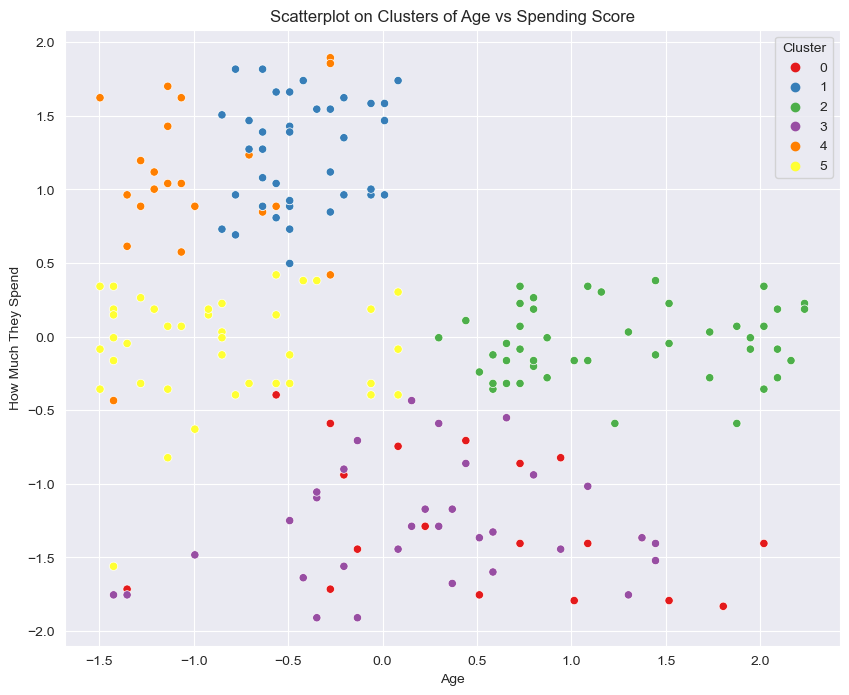

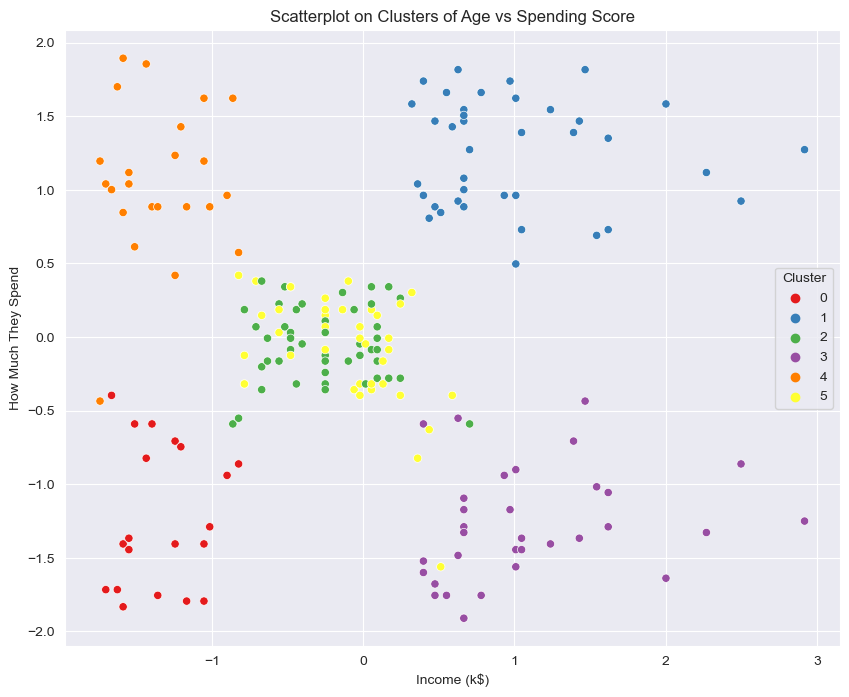

In [49]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='How Much They Spend', data=spec_clustered, hue='Cluster', palette='Set1', legend='full')
plt.title('Scatterplot on Clusters of Age vs Spending Score')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Income (k$)', y='How Much They Spend', data=spec_clustered, hue='Cluster', palette='Set1', legend='full')
plt.title('Scatterplot on Clusters of Age vs Spending Score')
plt.show()

In [50]:
data_int = pd.read_csv('./Customer_Dataset.csv')
data_int = data_int[['Age', 'Income (k$)', 'How Much They Spend']]
data_int['Cluster'] = spec_clustered['Cluster']
data_int

Age  Income (k$)  How Much They Spend  Cluster
0     19           15                   39        4
1     21           15                   81        4
2     20           16                    6        0
3     23           16                   77        4
4     31           17                   40        0
..   ...          ...                  ...      ...
195   35          120                   79        1
196   45          126                   28        3
197   32          126                   74        1
198   32          137                   18        3
199   30          137                   83        1

[200 rows x 4 columns]

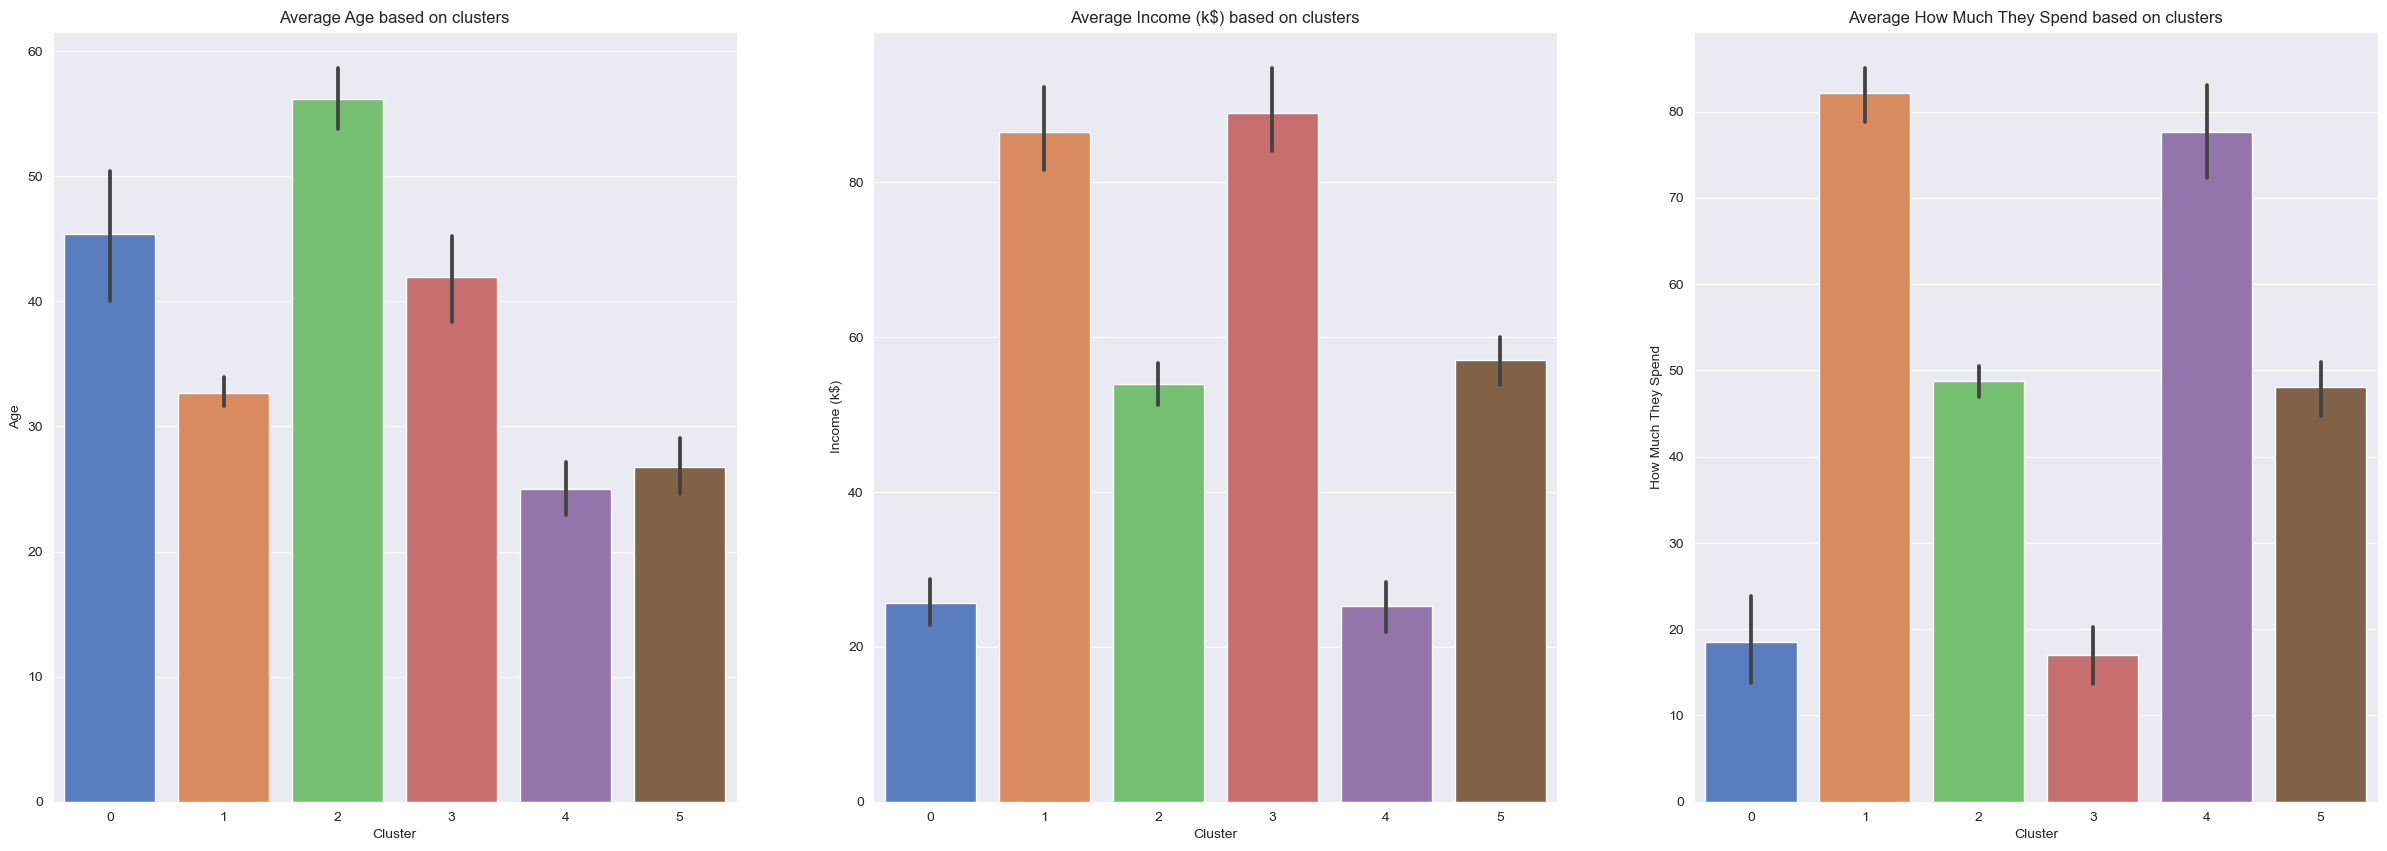

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))

sns.barplot(data=data_int, y=data_int.columns[0], x="Cluster", ax=ax1)
ax1.set_title(f"Average {data_int.columns[0]} based on clusters")

sns.barplot(data=data_int, y=data_int.columns[1], x="Cluster", ax=ax2)
ax2.set_title(f"Average {data_int.columns[1]} based on clusters")

sns.barplot(data=data_int, y=data_int.columns[2], x="Cluster", ax=ax3)
ax3.set_title(f"Average {data_int.columns[2]} based on clusters")

plt.show()

While we interpret the clusters, we will try to compare them with the types of customers that were researched from the background information

#### Cluster 0: Middle Aged, Low Spenders with Low Income
- This group of customers that come to the mall are in their 40s, have an quite a low income of around 25k and have a low spending score of around 20. They spend within their means and are likely to be cautious with their spendings. This cluster could be considered a type of needs-based customer.

#### Cluster 1: Middle Aged, High Spenders with High Income
- This group of customers that come to the mall are in their early 30s, have a high income of around 100k and also have a high spending score in the low 80s. The more money people make, the more they tend to spend. These customers can afford to spend on luxurious things and could be considered loyal customers, coming regularly to the mall.

#### Cluster 2: Elderly, Moderate Spenders with Moderate Income
- This group of customers that come to the mall are in their 50s, have a moderate income of around 55k and also have a moderate spending score of around 50. These customers could be considered wandering customers, as at their age, they start to have less and less responsibilities, frequenting the mall and having adequate income to purchase goods that they like while walking around the mall

#### Cluster 3: Middle Aged, Low Spenders with High Income
- This group of customers that come to the mall are in their early 40s, have a high income of around 100k but have a low spending score of around 15. These customers are considered needs-based customers. Despite the high income, these customers only spend on neccessities and do not splurge, likely saving for future plans or investing to earn more.

#### Cluster 4: Young Adults, High Spenders with Low Income
- This group of customers that come to the mall are in their 20s, have a low income of 25k but have a high spending score of close to 80. These customers may not spend within their means considering they have a high spending score with low income, and are considered impulse customers. They may not like to research on many different platforms to find the cheapest product, and may tend to buy things in an instant, and find them not useful after a while.

#### Cluster 5: Young Adults, Moderate Spenders with Moderate Income
- This group of customers that come to the mall are in their 20s, have a moderate income of 55k and also have a moderate income of around 50. These customers have a balanced approach to their finances, allowing them to go to the mall and purchase goods without overspending. These customers are likely to think about their purchases before acting on them, making sure they have made the right call.

#### What group is valuable to the shopping mall?
- Cluster 1: Middle Aged, High Spenders with High Income
    - This group is valuable to the mall due to their combination of high spending with high income. They can afford to make big purchases, which can be a big boost to the mall's earnings. They are likely to spend on items on the pricier end, and want a 'high-class' experience when coming to the mall.
    
#### Some groups that also may be valuable to the shopping mall
    
- Cluster 3: Middle Aged, Low Spenders with High Income
    - This group is valuable to the mall because even though they are low spenders, they still have a high income and that cannot be ignored. By further understanding this group of customer's preferences, likes and dislikes, the mall can implement what they have learnt, attracting this untapped area of revenue to boost the mall's earnings.
    
    
- Cluster 4: Young Adults, High Spenders with Low Income
    - This group is valuable to the mall because even though they have a low income, they still have a high spending score which benefits the mall. Even though their purchases may not be very consistent as they are not spending within their means, their impulsive buying can boost the mall's revenue for example, whenever a new cool product arrives or something that attracts their eye.

#### What can the mall do to retain these customers?
- Cluster 1: Middle Aged, High Spenders with High Income
    - The mall can attract more luxurious shops to their mall, like designer brands or fine-dining restaurants, to attract these customers who want to come to the mall for a premium shopping experience.
    
    
- Cluster 3: Middle Aged, Low Spenders with High Income
    - The mall can first get to know this group of customer's preferences, and look to attract shops that cater to those preferences. For example, it could be shops selling affordable items of high-quality, or goods that they can see themselves benefitting from it.
    
    
- Cluster 4: Young Adults, High Spenders with Low Income
    - The mall can pin down on their impulsiveness, maybe setting up pop-up stores with limited items, to give these customers FOMO (fear of missing out). As these are young adults that likely use social media, having online outreach through these social media apps can attract these customers want to come to the mall even from their own home.

### Reflection

Doing this assignment, I learnt how to implement unsupervised learning through clustering, trying different models and interpret clusters in a given context. 

However, it is important to note that there are not many features, which can limit the information that we can extract from these clusters.

Personally, I found it challenging at the start as I was very confused on how unsupervised learning works. However, after trial and error, I was understanding more about it and starting to get a grasp. I was also unsure on how to implement hyperparameter tuning, after which I found out about DBSCAN and Gaussian Mixture Models, where I looped through parameters to find what works best.